In [1]:
%matplotlib notebook
import numpy as np
from math import factorial, comb
import matplotlib.pyplot as plt
np.random.seed(0)

# Birthday Problem
___

## Problem Statement
There are n people in a room, with n ≥ 2. Let $A_n$ be the event “At least two people have the same birthday”
1.  Compute $P(A_n)$.
2.  Write a Python program that computes the minimum value of n such that $P(A_n) \geq 0.5$ 

## Solution
### 1)
It is easier to compute $P(A_n^c)$. The total number of possibilities $\vert \Omega \vert$ is given as-
\begin{equation}
\begin{split}
\vert \Omega \vert &= 365^n
\end{split}
\end{equation}
The number of elements in $A_n^c$ is given as-
\begin{equation}
\begin{split}
\vert A_n^c \vert &= \binom{365}{n} n!\\
\\
\therefore P(A_n^c)&=\frac{\binom{365}{n} n!}{365^n}\\
\\
\implies P(A_n)&=1-\frac{\binom{365}{n} n!}{365^n}
\end{split}
\end{equation}

### 2)
The code simulating the above situation is given in the next cell.

In [2]:
req_P=0.5# change minimum required probability here.
n=2
numerator=365
denominator=365
while True:
    #the numerator and denominator simplifies to this
    numerator*=(365-n+1)
    denominator*=365
    P_An=1-numerator/denominator
    if P_An>=req_P:
        print("Minimum n required=",n)
        print("P(A_n)=",P_An)
        break
    n+=1

Minimum n required= 23
P(A_n)= 0.5072972343239854


# Conditional Probabilities
---
## Problem Statement
In a foreign country, the sun shines with probability $s \in (0, 1)$ on average. Two institutes forecast the weather every day; they only predict whether the day will be sunny, and conduct their predictions independently. Institute A is right with probability $a$ and institute B with probability $b$ independently of what they predict. We note $S$ the event “the day will be sunny”, and $A_S$ (resp. $B_S$) the event “institute A predicts a sunny day” (resp. institute B).

For numerical applications, we will take $s = 0.8$, $a = 0.95$, and $b = 0.9$.

1. What is the probability of $A_S$? Give your answer in terms of the problem parameters first, and then do the numerical application.

2. One day, institute A says that the day will not be sunny, whereas institute B forecasts that it will. What is the probability that I can enjoy a sunny day? Give your answer in terms of the problem parameters first, and then do the numerical application with 3 significant digits.


## Solution
### 1)
Probability of $A_S$ can be computed as-
$$
\begin{split}
P(A_s)&= P(A_S|S)p(S)+P(A_S|S^c)P(S^c)\\
&= a s + (1-a)(1-s)\\
&= 0.77
\end{split}
$$

Similarly probability of $B_S$ can be computed as-
$$
\begin{split}
P(B_s)&= P(B_S|S)p(S)+P(B_S|S^c)P(S^c)\\
&= b s + (1-b)(1-s)\\
&= 0.74
\end{split}
$$
This situation is simulated in the next two cells.

In [3]:
# function to simulate one day as per the above conditions
def simulate(s,a,b):
    #simulate events S, A_s and B_s for one day
    S=np.random.choice(a=[1,0],p=[s,1-s])
    A=np.random.choice(a=[S,1-S],p=[a,1-a])
    B=np.random.choice(a=[S,1-S],p=[b,1-b])
    return S,A,B

In [4]:
s=0.8
a=0.95
b=0.9
N_days=100*365 #number of days to run the simulation for
result=np.zeros((3,N_days))
#run simulation for N_days days
for day in range(N_days):
    result[:,day]=simulate(s,a,b)
    
probs1=np.average(result,axis=1)#the results should coincide with P(S), P(A_s) and P(B_s)
print("Simulated P(S)=",probs1[0])#should be close to a
print("Simulated P(A_S)=",probs1[1])#should be close to P(A_S) from above
print("Simulated P(B_S)=",probs1[2])#should be close to P(B_S) from above

Simulated P(S)= 0.8003561643835616
Simulated P(A_S)= 0.7707397260273973
Simulated P(B_S)= 0.7368219178082192


### 2)
The required probability is $P(S|A_S^c\cap B_S)$, which can be calculated as per Bayes theorem-

One thing to note is that although A and B predict independently, their prediction of a day being sunny is statistically dependent on whether it is actually Sunny. Hence, $A_S^c$ and $B_S$ are not independent events. Formally,

\begin{equation}
\begin{split}
P(A_S^c \cap B_S)&=P(A_S^c \cap B_S|S)P(S)+P(A_S^c \cap B_S|S^c)P(S^c)\\
&=(1-a)bs+a(1-b)(1-s)\\
& \neq P(A_S^c)P(B_S)
\end{split}
\end{equation}
Taking this into account,

\begin{equation}
\begin{split}
P(S|A_S^c\cap B_S)&= \frac{P(A_S^c\cap B_S|S)P(S)}{P(A_S^c\cap B_S)}\\
&=\frac{(1-a)bs}{(1-a)bs+a(1-b)(1-s)}\\
&\approx 0.655
\end{split}
\end{equation}
This is simulated in the following cell

In [5]:
Ac_B=np.logical_and(result[1,:]==0,result[2,:]==1)# column indices for A_s^c intersection B_s
res_Ac_B=result[:,Ac_B]#take the required columns from the results array
probs2=np.average(res_Ac_B,axis=1) #get probabilities
print("Simulated P(S|A_S^c intersection B_S)=",probs2[0])

Simulated P(S|A_S^c intersection B_S)= 0.6571428571428571


# The Poisson Distribution
___
## Problem Statement
A discrete random variable X is said to follow the Poisson distribution with parameter $λ > 0$ if it takes values in $\mathbb{N}$ and has the following PMF:
$$
P_{poisson}(x)=\frac{\lambda^x}{x!}e^{-\lambda}
$$

Let us consider a time interval of length $T > 0$. We divide this interval in the n disjoint intervals $I^n_k= [k \frac{T}{n}, (k + 1)\frac{T}{n}]$
, with $n \in \mathbb{N}_>$ and $k \in \{0, \dots, n − 1\}$. We assume that, within each $I^n_k$, the rare event can happen only once and with a probability pn proportional to the length of the interval; i.e., $p_n = \frac{\lambda}{n}$. We assume that $n > λ >0$, so $p_n ∈ (0, 1)$.

1. Let $X^n_k$ be the Bernoulli variable that is 1 if the event happens within the interval $I^n_k$ and 0 otherwise, for $k \in \{0,\dots,n-1\}$. Assume that the variables $X^n_k$ are independent and define: $S_n = \sum_{k=1}^{n} X^n_k$. We denote the PMF of $S_n$ by $p_{S_n}$. What is the distribution of  $S_n$ and what is $p_{S_n}$?
2. Show that : $\lim_{n \to \infty} p_{S_n}(x)=\frac{\lambda^x}{x!}e^{-\lambda}$. You can use the following results-
\begin{equation}
\begin{split}
\lim_{n \to \infty} \frac{n!}{(n-k)!n^k}&=1,\,\,\,\,\,\forall k \in \mathbb{N}\\
\\
\lim_{n \to \infty} \left(1+\frac{t}{n}\right)^n&=e^t,\,\,\,\,\,\forall t \in \mathbb{R}
\end{split}
\end{equation}
3. Take $\lambda=7$. Write a Python script that plots on the same plot the function P_{poisson}(x) and $p_{S_n}$ for different values of $n$. Observe the convergence shown in the previous question as $n$ increases. 

## Solution
### 1)
$S_n$ follows a Binomial distribution with-
$$
p_{S_n}(S_n=x)=\binom{n}{x} \frac{\lambda}{n}^x \left(1-\frac{\lambda}{n}\right)^{n-x}
$$
### 2)
$$
\begin{split}
\lim_{n \to \infty} p_{S_n}(x)&=\lim_{n \to \infty}\binom{n}{x} \frac{\lambda}{n}^x \left(1-\frac{\lambda}{n}\right)^{n-x}\\
&=\lim_{n \to \infty} \frac{n!}{x!(n-x)!}\frac{\lambda}{n}^x \left(1-\frac{\lambda}{n}\right)^{n-x}\\
&=\lim_{n \to \infty} \left[\frac{n!}{(n-x)!n^x}\right]\frac{\lambda^x}{x!}\left(1-\frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-x}\\
&=1 \times \frac{\lambda^x}{x!} \times e^{-\lambda} \times 1\\
&= \frac{\lambda^x}{x!}e^{-\lambda}
\end{split}
$$
### 3)
The next cell has code for demonstrating the above convergence as $n \to \infty$.

<IPython.core.display.Javascript object>


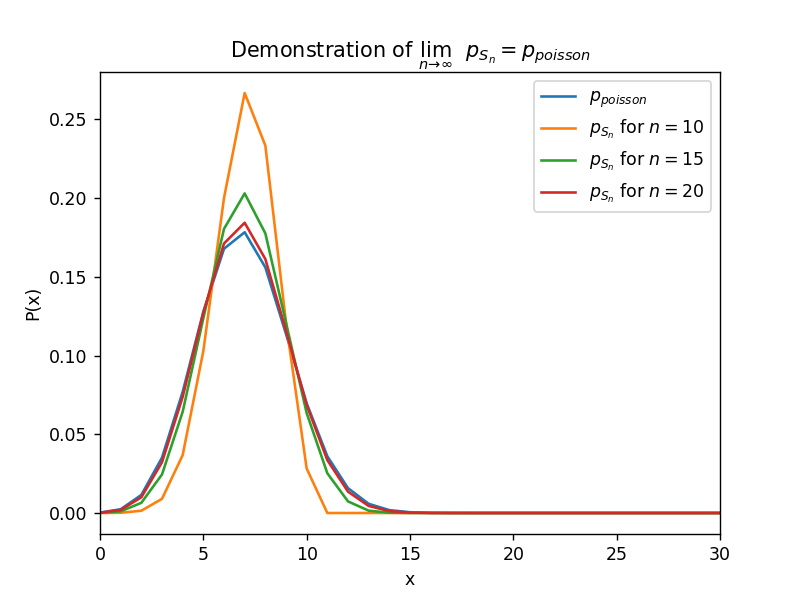

Text(0, 0.5, 'P(x)')

In [6]:
def p_poisson(x,lambd):
    return (pow(lambd,x)*np.exp(-lambd))/factorial(x)

def p_Sn(x,n,p):
    return comb(n,x)* pow(p,x) * pow((1-p),(n-x))

lambd=7
ns=[10,15,20]
max_x=30
result=np.zeros((len(ns)+1,max_x+1))
for x in range(max_x+1):
    result[0,x]=p_Sn(x,n,lambd/n)
idx=1
for n in ns:
    for x in range(min(n+1,max_x)):
        result[idx,x]=p_Sn(x,n,lambd/n)
    idx+=1
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(result[0,:],label=r'$p_{poisson}$')
idx=1
for n in ns:
    label=r'$p_{S_n}$'+' for $n={n}$'.format(n=n)
    ax.plot(result[idx,:],label=label)
    idx+=1
plt.legend()
plt.xlim([0,max_x])
plt.title(r'Demonstration of $\lim_{n \to \infty}$  $p_{S_n} = p_{poisson}$')
plt.xlabel(r'x')
plt.ylabel(r'P(x)')